<h2>The Analysis of Data</h2>

The dataset consists of several medical predictor (independent) variables and one target (dependent) variable, i.e., "Outcome". Independent variables include: the number of pregnancies the patient has had, glugose level , blood pressure, skin thickness, insulin level, insulin level, diabetes pedigree function, and age. In total, there are 764 rows and 9 columns.

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("Diabetes_FI.csv")


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on observations, this dataset is pretty clean with no any missing data. Now whether there are any significant outliers in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E0C155C388>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

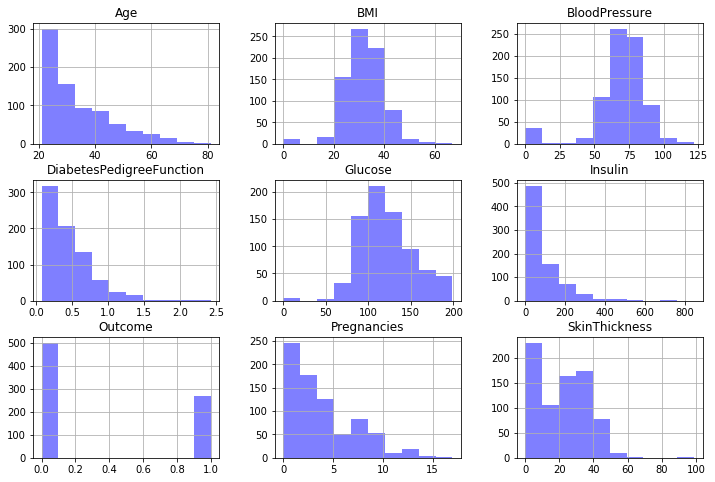

In [12]:
import matplotlib.pyplot as plt

plt.figure()
df.hist(color='b',alpha=0.5, figsize=(12,8))

There seems no significant outliers using this histogramatic graphical analysis. 

Using this dataset, we made a model in azure ML using a template and then changing some parameters, we got results for 5 models

In [14]:
training_results = {"model_name": ["Two-class Boosted Decision Tree","Two-class Boosted Decision Tree with SMOTE", "Two-class Decision Forest","Two-class Logistic Regression","Two-class Neural Network","Two-class Support Vector Machine"], 
           "accuracy": [0.751, 0.751, 0.755, 0.755, 0.712, 0.69], 
           "precision": [0.697, 0.644, 0.675, 0.8, 0.87, 0.75], 
           "recall": [0.554, 0.699, 0.627, 0.434, 0.241, 0.217],
           "F1 score": [0.617, 0.671, 0.65, 0.563, 0.377, 0.336], 
           "AUC": [0.8, 0.799, 0.778, 0.846, 0.823, 0.79] }

training_results_df = pd.DataFrame.from_dict(training_results)
training_results_df

,model_name,accuracy,precision,recall,F1 score,AUC
0,Two-class Boosted Decision Tree,0.751,0.697,0.554,0.617,0.800
1,Two-class Boosted Decision Tree with SMOTE,0.751,0.644,0.699,0.671,0.799
2,Two-class Decision Forest,0.755,0.675,0.627,0.650,0.778
3,Two-class Logistic Regression,0.755,0.800,0.434,0.563,0.846
4,Two-class Neural Network,0.712,0.870,0.241,0.377,0.823
5,Two-class Support Vector Machine,0.690,0.750,0.217,0.336,0.790


In [15]:
df_testing = pd.read_csv('diabetes - testing.csv')
df_testing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_without SMOT,Score
0,0,123,72,0,0,36.3,0.258,52,1,1,0.792447
1,1,106,76,0,0,37.5,0.197,26,0,0,0.044945
2,6,190,92,0,0,35.5,0.278,66,1,1,0.560838
3,2,88,58,26,16,28.4,0.766,22,0,0,0.031713


Based on prediction results, the "Two-class Logistic Regression" training model does a pretty good job to accurately predict diabete outcome based on provided diagnostic measurements provided in all 4 cases. Our model trained with the use of Azure Machine Learning could serve as a useful tool for early screening for diabetes of females at least 21 years old, particular with Pima Indian heritage.